# Entendendo o mercado de livros no Brasil com Machine Learning.

*Integrantes*

<table align="left">
    <tr>
        <td>Nome:</td>
        <td><b>Hanna Mendes</b></td>
        <td>RA:</td>
        <td><b>00297782</b></td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td><b>João Guilherme Machado</b></td>
        <td>RA:</td>
        <td><b>00199035</b></td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td><b>Leticia Lopes Bueno</b></td>
        <td>RA:</td>
        <td><b>00297719</b></td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td><b>Lucca Cerf Costa</b></td>
        <td>RA:</td>
        <td><b>00304770</b></td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td><b>Pérola Harumi Tai</b></td>
        <td>RA:</td>
        <td><b>00297748</b></td>
    </tr>
</table>

# Contextualização

O mercado de livros no Brasil passou por diversos altos e baixos nos últimos anos, principalmente desde a chegada da pandemia do COVID-19, que atingiu inicialmente medidas de restrição adotadas. Entretanto, em 2021, 43,9 milhões de livros foram vendidos, um aumento de 4,7% em relação ao ano anterior (1), mas, apesar desse crescimento, apenas 51% dos brasileiros são leitores, mostrando que ainda existe um grande espaço para o crescimento do mercado livreiro.

Mesmo com a abertura de 60 novas livrarias em 2021, vimos duas grandes marcas consolidadas no mercado nacional, Saraiva e Livraria Cultura, passando por dificuldades, sendo obrigadas a fechar lojas de grande porte por todo o país. Isso nos mostra que as novas livrarias possuem um porte menor, além do investimento feito em e-commerce, ações necessárias  para se manterem no mercado.

(1) Relatório fechamento 2021 SNEL (Sindicato Nacional dos Editores de Livros)

# Problema de Negócio

Levando em consideração o cenário atual, buscamos identificar de forma mais clara o mercado liteário brasileiro, buscando entender melhor os hábitos de leitura, seja vendo as editoras mais populares, ou buscando qual tipo de livro o brasileiro está procurando, seja ele um livro de ficção ou um livro de auto-ajuda.

Neste projeto, utilizaremos [este](https://github.com/JonasBrother97/jeff_final/blob/master/df_livros.xlsx) dataset, composto pelos 15 livros mais vendidos semanalmente no Brasil, a partir de 2008, além de dados de usuários do site [Skoob](https://www.skoob.com.br/), o maior site de avaliações de livros por brasileiros, contendo o número de avaliações por livro e a nota de cada livro dada pelos usuários.

O projeto está dividido em 2 partes:

A primeira buscaremos classificar se um livro está acima ou abaixo da nota média.

A segunda parte utilizaremos a sinopse de cada livro para identificar a categoia do livro.

# Bibliotecas utilizadas:

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from joblib import dump
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
plt.style.use('seaborn-poster')
sns.set_style("ticks", {'axes.facecolor':'#fff2e8', 'figure.facecolor':'#ffead8'})
sns.set_palette("colorblind")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from IPython.display import display
import nltk 
nltk.download('popular')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\positivo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to

# Leitura dos dados e uma visualização das colunas

In [2]:
#Lendo dataframe
df = pd.read_excel('C:/Users/positivo/OneDrive/Documentos/Hanna/PUC/Semestres/3_Semestre/df_livros.xlsx', index_col=0)
df.head()

,isbn,titulo,autor,editora,categoria,paginas,sinopse,acabamento,preco,nota,avaliacoes,numero de vendas,data
0.0,9.786555e+12,As 9 leis inegociáveis da vida,Marcel Scalcko,Gente,Categoria Autoajuda,224.0,A renovação se constrói todos os dias. É um ol...,BROCHURA,65.00,0.0,0.0,3970.0,2021-08-27
1.0,9.786556e+12,A irmã desaparecida,Lucinda Riley,Arqueiro,Categoria Ficção,656.0,"O sétimo livro da série As Sete Irmãs, fenômen...",BROCHURA,48.66,4.6,128.0,3311.0,2021-08-27
2.0,9.786555e+12,Máquina de aquisição de clientes,André Siqueira,Gente,Categoria Negócios,256.0,Deixe de lado a mentalidade de estar sempre ve...,BROCHURA,54.90,0.0,0.0,2988.0,2021-08-27
3.0,9.786555e+12,Muito além da expectativas,Carlos Busch,Gente,Categoria Negócios,192.0,"Para ser um pioneiro, um inconformado, você de...",BROCHURA,44.90,0.0,0.0,2004.0,2021-08-27
4.0,9.788566e+12,Mentirosos,E. Lockhart,Seguinte,Categoria Infantojuvenil,272.0,"Um suspense moderno e sofisticado, Mentirosos ...",BROCHURA,21.90,4.2,35525.0,1893.0,2021-08-27


# Analisando os dados disponíveis

## Matriz de correlação

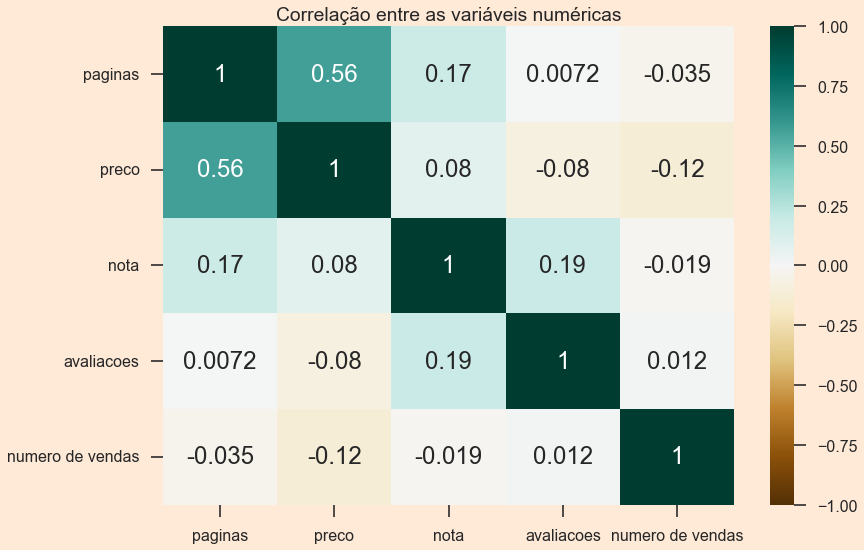

In [3]:
corr = sns.heatmap(df.corr().drop('isbn',  axis=1).drop('isbn', axis=0), vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.title('Correlação entre as variáveis numéricas')
plt.show()

Na matriz de correlação conseguimos ver a relação linear entre as variáveis numéricas. Cada célula representa a relação entre uma variável numérica e outra variável numérica, podendo variar o valor entre -1 e 1. Sendo -1 representando uma relação negativa e 1 representando uma relação positiva. Caso a relação seja 0, não existe relação entre as variáveis.

Em nosso caso, podemos verificar que não existe uma relação linea forte entre as variáveis, com exceção para o número de páginas de cada livro e o seu preço, que possui uma relação positiva moderada entre elas.

## Gráficos

In [4]:
# Removendo livros vendidos em Box
df_analise = df[~df.titulo.str.contains("Box")]
# Removendo livros com menos de 50 avaliações e sem preço.
df_analise = df_analise.loc[(df_analise['avaliacoes'] > 50)]

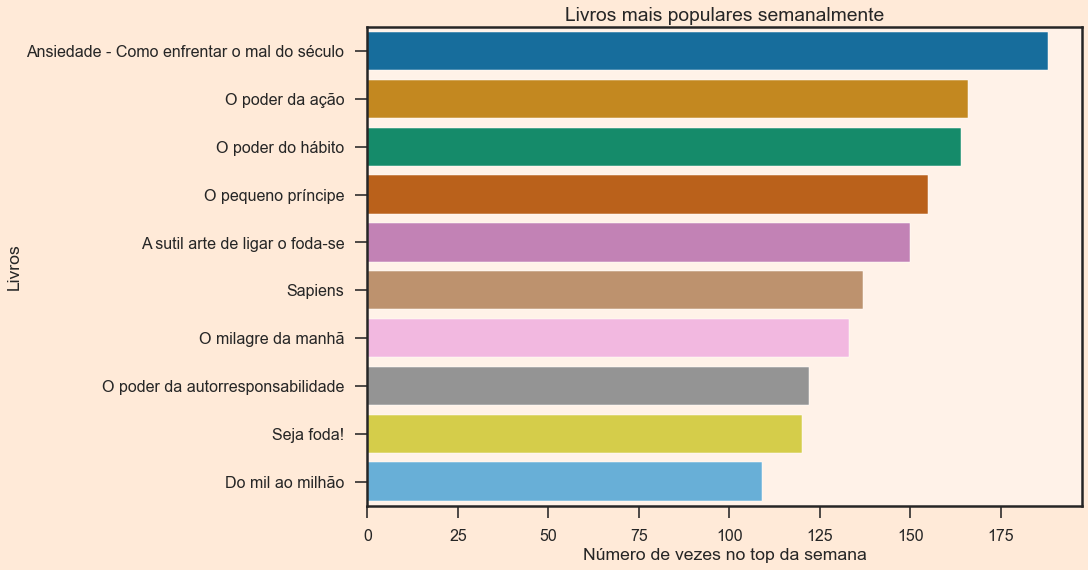

In [5]:
sns.barplot(x = df_analise['titulo'].value_counts()[:10],
            y = df_analise['titulo'].value_counts()[:10].index)

plt.title("Livros mais populares semanalmente")
plt.xlabel("Número de vezes no top da semana")
plt.ylabel("Livros")
plt.show()

Podemos verificar no gráfico os livros que mais apareceram nos mais vendidos da semana, tendo como destaque o livro "Ansiedade - Como enfrentar o mal do século", aparecendo mais de 50 vezes que o segundo colocado "O poder da ação".

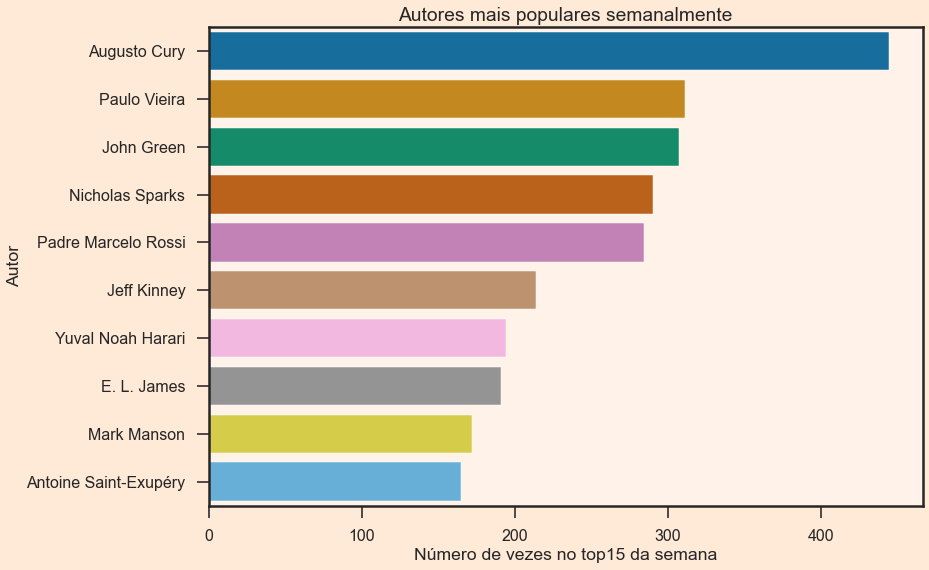

In [6]:
sns.barplot(x = df_analise['autor'].value_counts()[:10],
            y = df_analise['autor'].value_counts()[:10].index)

plt.title("Autores mais populares semanalmente")
plt.xlabel("Número de vezes no top15 da semana")
plt.ylabel("Autor")
plt.show()

O autor Augusto Cury ganha destaque nos mais repersentados semanalmente, como também o seu livro "Ansiedade - Como enfrentar o mal do século", visto no gráfico anterior.

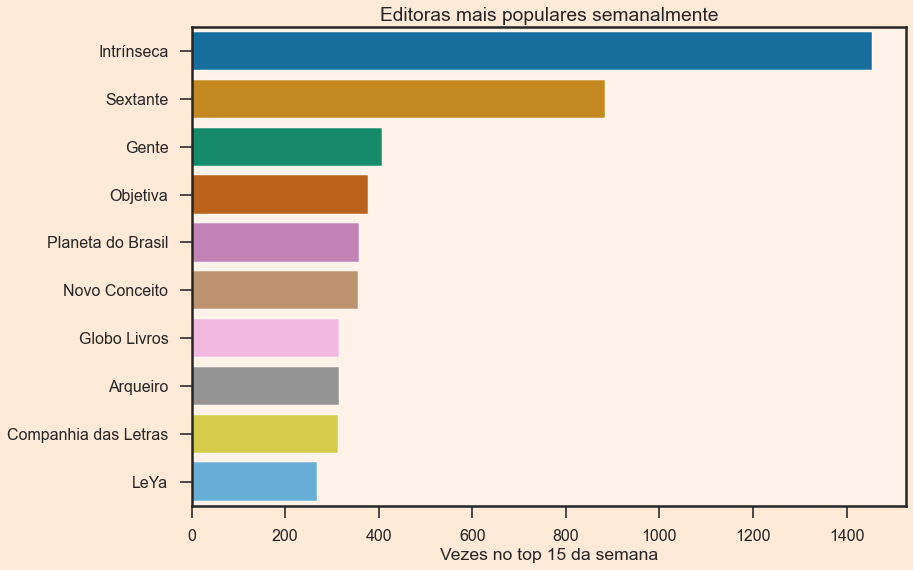

In [7]:
sns.barplot(x = df_analise['editora'].value_counts()[:10],
            y = df_analise['editora'].value_counts()[:10].index)

plt.title("Editoras mais populares semanalmente")
plt.xlabel("Vezes no top 15 da semana")
plt.ylabel("")
plt.show()

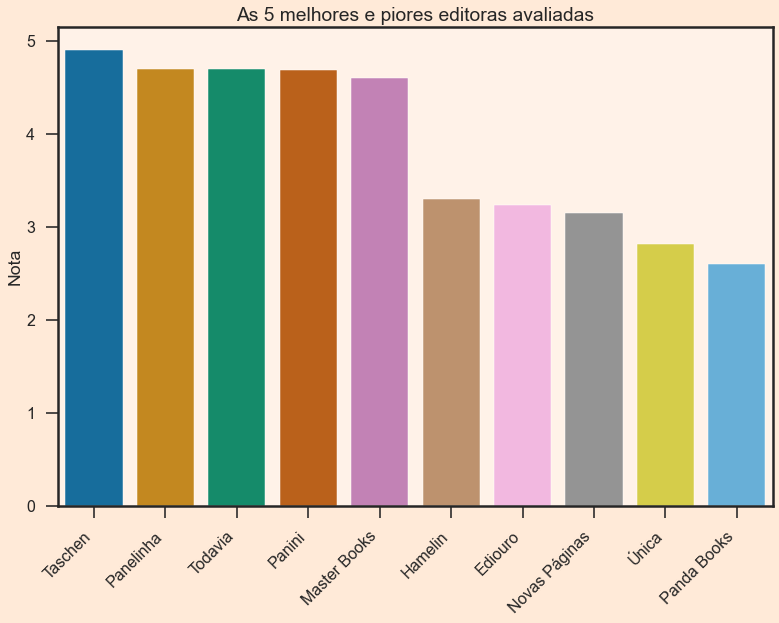

In [8]:
df_editora = pd.DataFrame(df_analise.groupby('editora').mean()['nota'].sort_values(ascending=False))
melhor_pior = pd.concat([df_editora.head(), df_editora.tail()])

ax = sns.barplot(data = df_analise, x = melhor_pior.index[:], y = melhor_pior.nota[:])

ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')

plt.title("As 5 melhores e piores editoras avaliadas")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

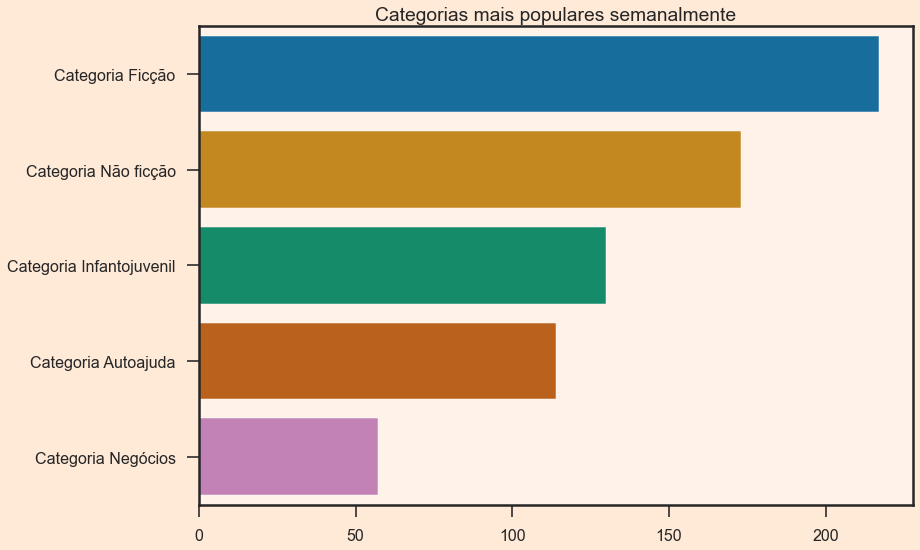

In [9]:
sns.barplot(x = df_analise.drop_duplicates(subset=['titulo']).categoria.value_counts(),
            y = df_analise.drop_duplicates(subset=['titulo']).categoria.value_counts().index)

plt.title("Categorias mais populares semanalmente")
plt.xlabel("")
plt.ylabel("")
plt.show()

Percebemos que a categoria ficção é a mais popular no mercado de livros, com os livros categorizados como Negócios, aparecendo apenas 1/4 das vezes em relação aos livros de ficção.

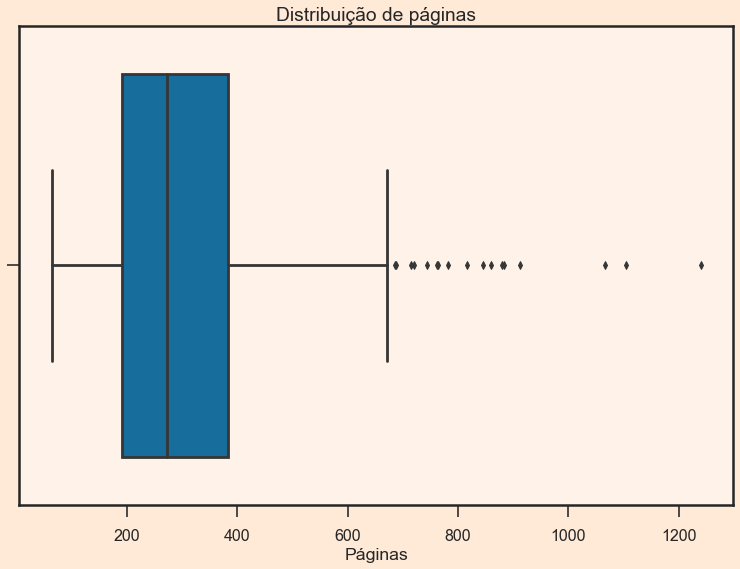

In [10]:
sns.boxplot(x = df_analise.groupby('titulo').mean()['paginas'])

plt.title("Distribuição de páginas")
plt.xlabel("Páginas")
plt.ylabel("")
plt.show()

Quando visualizamos a distribuição das páginas, percebemos que 50% dos livros possuem entre 200 e 400 páginas, com apenas alguns outliers com mais de 650 páginas.

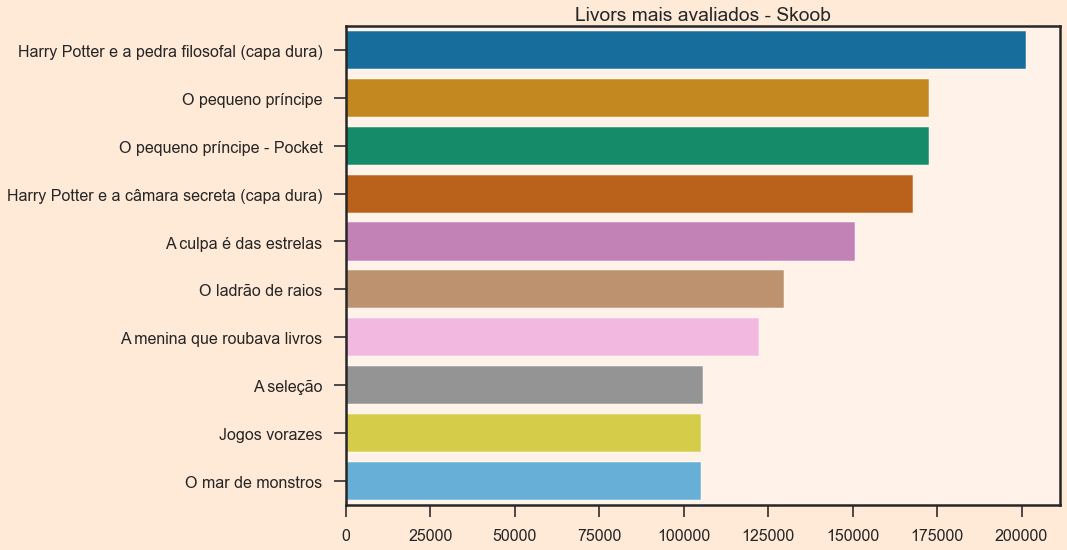

In [11]:
df_oi = df_analise.drop_duplicates(['titulo']).groupby('titulo').sum().sort_values(by=['avaliacoes'], ascending=False)[:10]

sns.barplot(y = df_oi.index[:10],
            x = df_oi.avaliacoes)

plt.title("Livors mais avaliados - Skoob")
plt.xlabel("")
plt.ylabel("")
plt.show()

Como visto anteriormente, a categoria ficção é a mais popular no mercado, e conseguimos verificar isso vendo os livros mais avaliados no Skoob, sendo os 10 mais avaliados da categoria ficção.

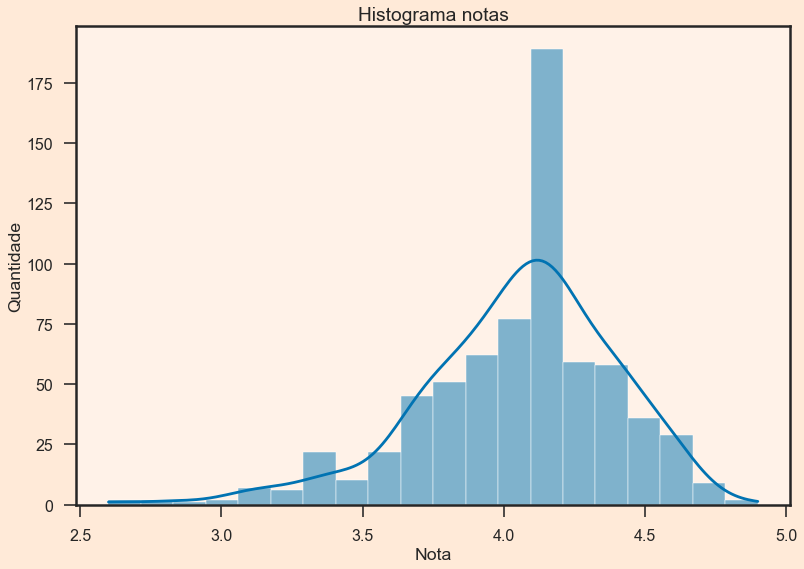

In [12]:
sns.histplot(df_analise.groupby('titulo').mean()['nota'], kde = True, bins=20)

plt.title("Histograma notas")
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

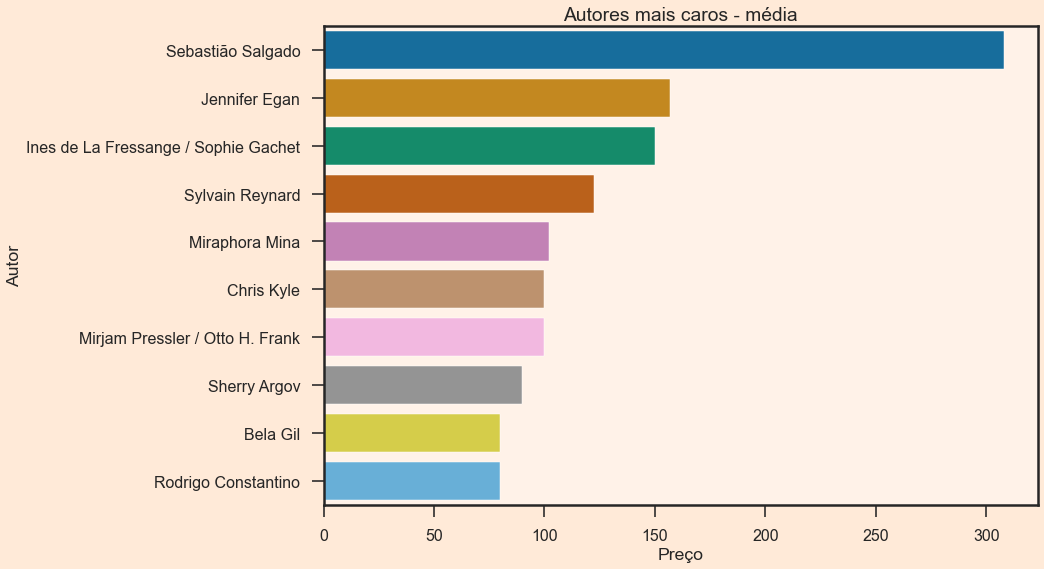

In [13]:
df_unico_autor = df_analise.drop_duplicates(subset=['titulo']).groupby('autor').mean().sort_values(by=['preco'], ascending=False)[:10]['preco']

sns.barplot(x = df_unico_autor, y = df_unico_autor.index[:10])

plt.title("Autores mais caros - média")
plt.xlabel("Preço")
plt.ylabel("Autor")
plt.show()

# Pre-processamento de dados para os modelos: 

## Ajustando o dataframe:
**A**. Retirando notação científica;

**B**. Filtrando por isbn para eliminar duplicidades;

**C**. Alterando o index para o tipo int;

**D**. Alterando as colunas isbn, paginas, avaliacoes e numero de vendas do tipo float para int;

**E**. Na coluna preco e nota, substituindo os valores nulos pela mediana dos valores;

**F**. juntando os dados com os dados originais;

***OBS***. Após o tratamento e retirada dos duplicados, o dataframe fica com apenas 958 linhas.

In [14]:
#retirando notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#filtrando pelo isbn
df.drop_duplicates(subset='isbn', keep='first', inplace=True)

#limitando o número de casas após a virgula
pd.options.display.float_format = "{:,.2f}".format

#alterando o index para o tipo int
df.index = df.index.map(int)

#alterando algumas colunas do tipo float para int
df['isbn'] = df['isbn'].astype(int)
df['paginas'] = df['paginas'].astype(int)
df['avaliacoes'] = df['avaliacoes'].astype(int)
df['numero de vendas'] = df['numero de vendas'].astype(int)

### Imputando valores vazios

Para se tratar dos dados vazios, utilizamos o método do sklearn de se inserir amediana dos valoers ja existentes.

In [15]:
imp_mean = SimpleImputer(strategy='median')

# Na coluna preco e nota, substituir os valores nulos pela mediana dos valores
imputados = pd.DataFrame(imp_mean.fit_transform(df[['preco', 'nota']]))

# juntando os dados com os dados originais
df.reset_index(drop=True, inplace=True)
df.drop(['nota', 'preco'], axis=1, inplace=True)
df = pd.concat([imputados, df], axis=1)
df.rename(columns={0: 'preco', 1: 'nota'}, inplace=True)
df.head()

,preco,nota,isbn,titulo,autor,editora,categoria,paginas,sinopse,acabamento,avaliacoes,numero de vendas,data
0,65.00,0.00,-2147483648,As 9 leis inegociáveis da vida,Marcel Scalcko,Gente,Categoria Autoajuda,224,A renovação se constrói todos os dias. É um ol...,BROCHURA,0,3970,2021-08-27
1,48.66,4.60,-2147483648,A irmã desaparecida,Lucinda Riley,Arqueiro,Categoria Ficção,656,"O sétimo livro da série As Sete Irmãs, fenômen...",BROCHURA,128,3311,2021-08-27
2,54.90,0.00,-2147483648,Máquina de aquisição de clientes,André Siqueira,Gente,Categoria Negócios,256,Deixe de lado a mentalidade de estar sempre ve...,BROCHURA,0,2988,2021-08-27
3,44.90,0.00,-2147483648,Muito além da expectativas,Carlos Busch,Gente,Categoria Negócios,192,"Para ser um pioneiro, um inconformado, você de...",BROCHURA,0,2004,2021-08-27
4,21.90,4.20,-2147483648,Mentirosos,E. Lockhart,Seguinte,Categoria Infantojuvenil,272,"Um suspense moderno e sofisticado, Mentirosos ...",BROCHURA,35525,1893,2021-08-27


# Parte 1: Livros acima ou abaixo da média

## Transformando a variável preço em 0 e 1

Estamos por meio dos modelos de classificação, buscando os livros que estão abaixo ou acima da media, assim, transformamos a variável preço em 0 e 1. Sendo 0 para os que estão abaixo da média e 1 para os que estão acima dela.

In [16]:
df.nota = df.nota.apply(lambda x: 0 if x <= df['nota'].mean() else 1)

## Definindo as variáveis

Para conseguirmos chegar ao nosso resultado se o livro esta ou não acima da média, precisamos definir as variáveis. Apesar do preço não possuir uma forte correlação linear com a nota, como visto anteriormente, acreditamos que o preço seja uma variável importante para a classificação para os modelos que não utilizam apenas a linearidade das variáveis para se chegar ao resultado.

As variáveis autor e editora representam as variáveis categóricas de nossos modelos, em que buscamos traçar uma relação entre elas e a nota.

In [17]:
X = df[['preco', 'autor', 'editora']]
y = df['nota']

## Categorical Transformations

Precisamos transformar as variáveis categoricas em número, já que os modelos do skelearn aceitam apenas números. Assim, utilizamos o método OneHotEncoder que transforma as variáveis categóricas em um array de números.

In [18]:
cat_variaveis = ['autor', 'editora']
X_cat = OneHotEncoder(sparse=False, handle_unknown='ignore').fit_transform(X[cat_variaveis])

## Numerical Transformations

Para a transformação da variável numérica, precisamos escalar e normalizar os dados. 

Para a primeira etapa, utilizaremos o método MinMaxScaler do sklearn, coloca os dados em uma mesma escala, que aprimora o ersultado de alguns modelos que dependem fortemente da distância entre os pontos, como o modelo KNN, que será visto psoteriormente.

Para normalizarmos, transformaremos os dados em logarítmo, para assim alcançarmos uma curva de distribuição centralizada, e não "torta" para a esquerda.

In [19]:
num_variables = ['preco']
X_num = FunctionTransformer(np.log1p).fit_transform(X[num_variables])
X_num = MinMaxScaler().fit_transform(X_num)
X_num = pd.DataFrame(X_num, columns=['preco_scaled'])

Juntando novamente os dados categoricos e numéricos em uma unica variável.

In [20]:
X = pd.concat([X_num.reset_index(drop=True), pd.DataFrame(X_cat)], axis=1)

### Visualizando os dados numéricos não normalizados

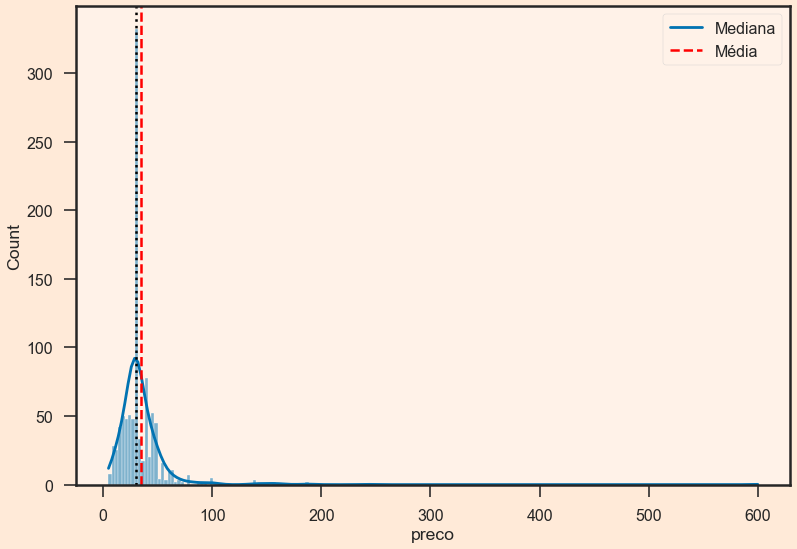

In [21]:
sns.histplot(data=df, x='preco', kde=True)
plt.axvline(df['preco'].mean(), c='red', ls='--', lw=2.5)
plt.axvline(df['preco'].median(), c='black', ls=':', lw=2.5)
plt.legend(['Mediana', 'Média'])
plt.show()

Podemos verificar que a média e amediana, apesar de próximas, não estão centralizadas.

### Visualizando os dados numéricos normalizados

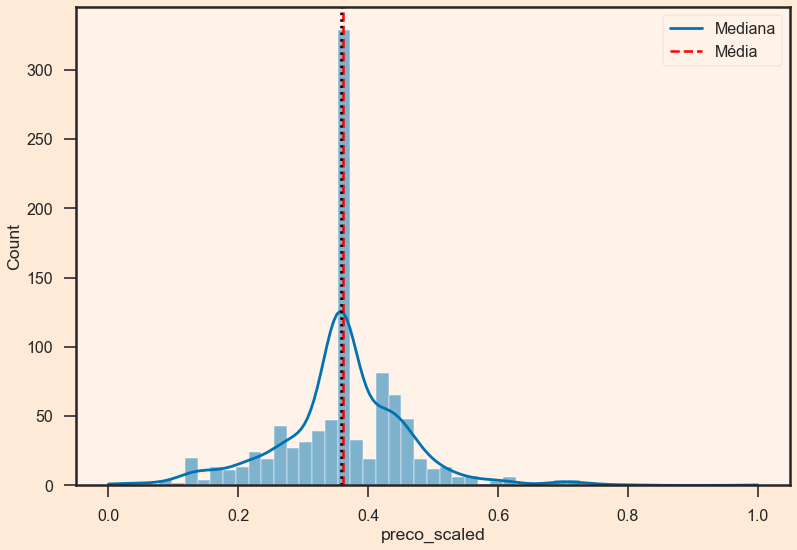

In [22]:
sns.histplot(data=X, x="preco_scaled", kde=True)
plt.axvline(X["preco_scaled"].mean(), c='red', ls='--', lw=2.5)
plt.axvline(X["preco_scaled"].median(), c='black', ls=':', lw=2.5)
plt.legend(['Mediana', 'Média'])
plt.show()

Com a utilização da normalização (log), podemos verificar que a média e mediana estão centralizadas, e a curva de distribuição também.

Obs: Colocar os dados em escala, como feito, não altera na normalização dos dados, apenas o log que faz a nomalização.

## Separando os dados em treinamento e teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=42, test_size=0.2)

## Criação dos modelos

Para a criação dos modelos a seguir, utilizaremos o GridSearchCV, um método de busca de parâmetros que utiliza pesquisa em grade para encontrar os melhores parâmetros para cada modelo, com excessão do modelo Dummy.

## Dummy

Nosso modelo de baseline funciona de maneira semelhante a um grupo de controle, pois permite que você verifique a sanidade do seu modelo de classificação.

Criamos modelos de baseline não para prever o futuro, mas para servir de ponto de partida para modelos mais avançados.

In [24]:
dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train, y_train);

### Matriz de confusão

Verdadeiro Negativo | Falso Positivo

Falso Negativo                      | Verdadeiro Positivo

O desempenho de um algoritmo pode ser visto em uma tabela chamada matriz de confusão.
Ele exibe os rótulos potenciais junto com a porcentagem de cada rótulo que o modelo previu correta e erroneamente.

Aqui, ajustamos o modelo, fazemos previsões e, em seguida, exibimos a matriz de confusão.

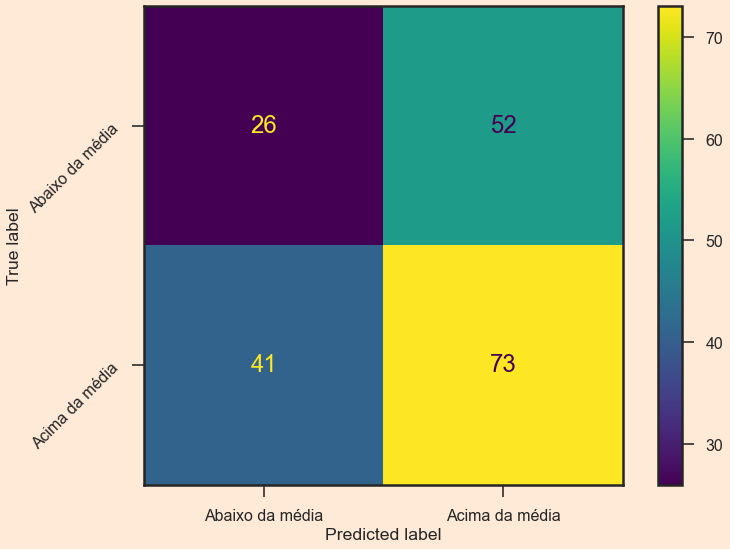

In [25]:
dummy_prediction = dummy.predict(X_test)
dummy_cm = confusion_matrix(y_test, dummy_prediction)

ConfusionMatrixDisplay(dummy_cm, display_labels=["Abaixo da média", "Acima da média"]).plot()
plt.yticks(rotation=45)
plt.show()

Os quatro quadrantes da matriz de confusão são discutidos abaixo.
Esses rankings mudarão com base em quais valores consideramos positivos.

Verdadeiro negativo (TN): Exemplos rotulados negativamente que o modelo prevê corretamente.
Este está localizado no quadrante superior esquerdo.

Falso positivo (FP): Exemplos rotulados negativamente que o modelo prevê erroneamente como positivos.
Este está localizado no quadrante superior direito.

Falso negativo (FN): Exemplos rotulados positivamente que o modelo prediz erroneamente como negativos.
Este está localizado no quadrante inferior esquerdo.

Verdadeiro positivo (TP): Exemplos rotulados positivamente que o modelo previu corretamente como positivos.
Este está localizado no quadrante inferior direito.

Em todo modelo de classificação buscamos minimixar ao máximo os Falso Positivo e os Falso Negativo, aqui representados com os números 52 e 41 respectivamente, para que o modelo não classifique nenhum dados como errado.

### Métricas

In [26]:
dummy_metricas = {'model': list(), 'accuracy': list(), 'precision': list(), 'recall': list(), 'f1_score': list()}
dummy_metricas["accuracy"].append(accuracy_score(y_test, dummy_prediction))
dummy_metricas["precision"].append(precision_score(y_test, dummy_prediction))
dummy_metricas["recall"].append(recall_score(y_test, dummy_prediction))
dummy_metricas["f1_score"].append(f1_score(y_test, dummy_prediction))
dummy_metricas['model'].append('Dummy')

dummy_metricas = pd.DataFrame(dummy_metricas)
dummy_metricas

,model,accuracy,precision,recall,f1_score
0,Dummy,0.52,0.58,0.64,0.61


Como esperado, o modelo Dummy possui uma baixa acurácia, o que indica que o modelo não é bom para classificar dados.

In [27]:
print(
    classification_report(
        y_test,
        dummy_prediction,
        target_names=["Livro abaixo da média", "Livro acima da média"]
    )
)

                       precision    recall  f1-score   support

Livro abaixo da média       0.39      0.33      0.36        78
 Livro acima da média       0.58      0.64      0.61       114

             accuracy                           0.52       192
            macro avg       0.49      0.49      0.48       192
         weighted avg       0.50      0.52      0.51       192



## KNN

O algoritmo de k-vizinhos mais próximos, ou KNN, é um algoritmo de classificação que utiliza a distância entre os pontos como um critério de classificação. A distância é calculada entre os pontos através de uma função de distância, sendo a euclidiana, a mais comum.

O valor mais conhecido do modelo, é a variável k, que representa o número de vizinhos mais próximos que serão considerados para a classificação. Sendo assim, podemos definir o valor de k como o número de vizinhos mais próximos que serão considerados para a classificação. 

No KNN, quando o valor de k é pequeno (1 ou 2), produzimos um modelo muito flexível, em que apenasd um ponto afeta totalmente o resultado, principalmente outliers, causando overfitting. Quando o valor de k é grande (maior que 10), produzimos um modelo muito restrito, em que todos os pontos afetam o resultado, podendo causar underfitting. Normalmente se escolhe para o valor de k entre 1 e 20.

Como o KNN utiliza a distância Euclidiana para se calcular a distância entre os pontos, é nececessário se escalar os dados para que as variáveis de larga escala não dominem as distâncias, como fizemos anteriormente ao se utilizar a função MinMaxScaler.

In [28]:
n_neighbors = list(range(1, 21))
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=n_neighbors, weights=weights)
knn = KNeighborsClassifier()
knn = GridSearchCV(knn, param_grid, scoring='accuracy')
knn.fit(X_train, y_train)
print(knn.best_params_)

{'n_neighbors': 20, 'weights': 'distance'}


Em nosso modelo podemos definir o valor de k, aqui buscamos o melhor resultado para os valoers entre1 e 20, e também pdoemos definir o peso que o modelo do SKlearn utiliza para calcular a distância, podendo ser "uniform" ou "distance".

‘uniforme’: pesos uniformes. Todos os pontos em cada vizinhança são ponderados igualmente.

‘distância’ : pontos de peso pelo inverso de sua distância. neste caso, os vizinhos mais próximos de um ponto de consulta terão uma influência maior do que os vizinhos mais distantes.

In [29]:
knn_param = pd.DataFrame(knn.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
knn_param['params'] = knn_param['params'].astype('string')
novo = knn_param['params'].str.split(',', expand=True)
knn_param['k'] = novo[0]
knn_param['weights'] = novo[1]
knn_param['k'] = knn_param['k'].replace("{'n_neighbors':", '', regex=True)
knn_param['weights'] = knn_param['weights'].replace("'weights': '", '', regex=True)
knn_param['weights'] = knn_param['weights'].replace("'}", '', regex=True)
knn_param['k'] = knn_param['k'].astype('int')
knn_param.drop('params', axis=1, inplace=True)

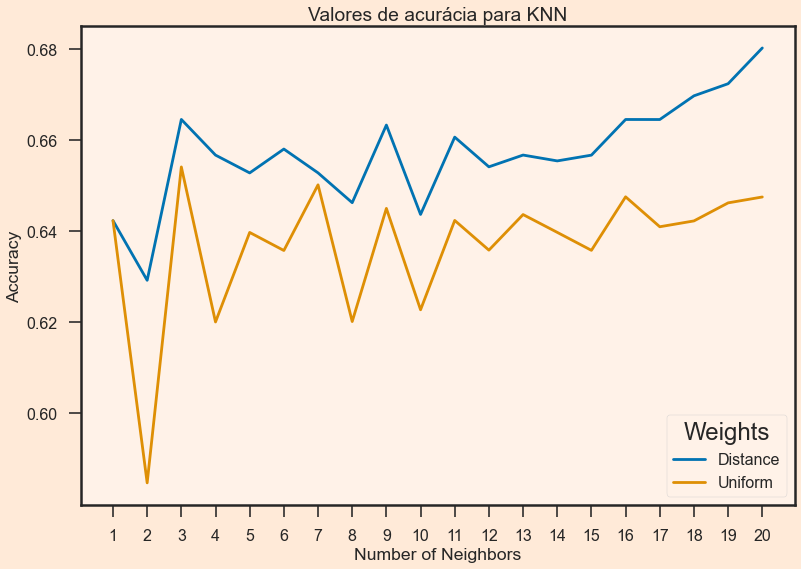

In [30]:
sns.lineplot(data=knn_param, x='k', y='mean_test_score', hue='weights')
plt.title('Valores de acurácia para KNN')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.xticks(n_neighbors)
plt.legend(title='Weights', labels=['Distance', 'Uniform'], loc='lower right')
plt.show()

No gráfico conseguimos verificar todos os valores de k, e o peso utilizado, assim, podemos verificar o melhor resultado possível para os nossos dados e utilizar o modelo com o melhor valor de k e peso.

### Matriz de confusão 

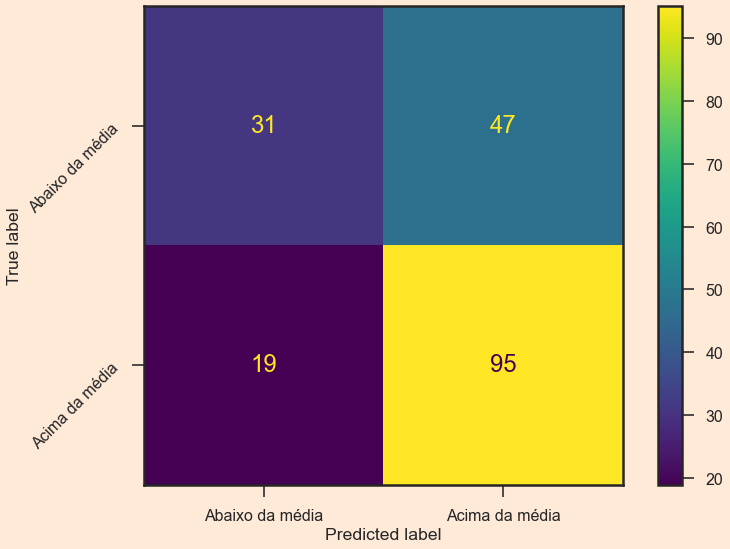

In [31]:
knn_prediction = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_prediction)
ConfusionMatrixDisplay(knn_cm, display_labels=["Abaixo da média", "Acima da média"]).plot()
plt.yticks(rotation=45)
plt.show()

Podemos verificar que conseguimos resultados melhores em comparação com o modelo Dummy, indicando que o modelo KNN é melhor que o modelo Dummy.

### Métricas

In [32]:
knn_metricas = {'model': list(), 'accuracy': list(), 'precision': list(), 'recall': list(), 'f1_score': list()}
knn_metricas["accuracy"].append(accuracy_score(y_test, knn_prediction))
knn_metricas["precision"].append(precision_score(y_test, knn_prediction))
knn_metricas["recall"].append(recall_score(y_test, knn_prediction))
knn_metricas["f1_score"].append(f1_score(y_test, knn_prediction))
knn_metricas['model'].append('KNN')
knn_metricas = pd.DataFrame(knn_metricas)
knn_metricas

,model,accuracy,precision,recall,f1_score
0,KNN,0.66,0.67,0.83,0.74


In [33]:
print(
    classification_report(
        y_test,
        knn_prediction,
        target_names=["Livro abaixo da média", "Livro acima da média"]
    )
)

                       precision    recall  f1-score   support

Livro abaixo da média       0.62      0.40      0.48        78
 Livro acima da média       0.67      0.83      0.74       114

             accuracy                           0.66       192
            macro avg       0.64      0.62      0.61       192
         weighted avg       0.65      0.66      0.64       192



Apesar de resultados melhores, o modelo KNN não consegue classificar tão corretamente os livros que estão abaixo da média ,em comparação com os que estão acima da média.

## Regressão Logística

A regressão logística é uma ferramenta estatística utilizada para prever o acontecimento de algum evento específico, em nosso caso, se um livro é melhor ou pior com base no seu ator, editora e preço. Na maioria das vezes, a regressão logística é utilizada quando a variável categórica é binária, ou seja, representa dois estados possíveis (0 ou 1, sim ou não), baseando-se nas variáveis explicativas, que podem ser binárias, strings etc.

Apesar de ser mais comum sendo binária, a regressão logística também pode ser multinomial, onde a variável categórica tem três ou mais estados e não tem ordem específica, ou ordinal, que é semelhante à multinomial, mas possui uma ordem.

Em nosso caso, a regressão logística é binária e tem o objetivo de prever se a nota de um livro é maior ou menor do que a média se baseando no autor, editora e preço

In [34]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = dict(solver=solver)
log_reg = LogisticRegression(random_state=42)
log_reg = GridSearchCV(log_reg, param_grid, scoring='accuracy')
log_reg.fit(X_train, y_train)
print(log_reg.best_params_)

{'solver': 'liblinear'}


In [35]:
log_reg_param = pd.DataFrame(log_reg.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
log_reg_param

,mean_test_score,params
2,0.65,{'solver': 'liblinear'}
0,0.65,{'solver': 'newton-cg'}
1,0.65,{'solver': 'lbfgs'}
3,0.65,{'solver': 'sag'}
4,0.65,{'solver': 'saga'}


### Matriz de confusão

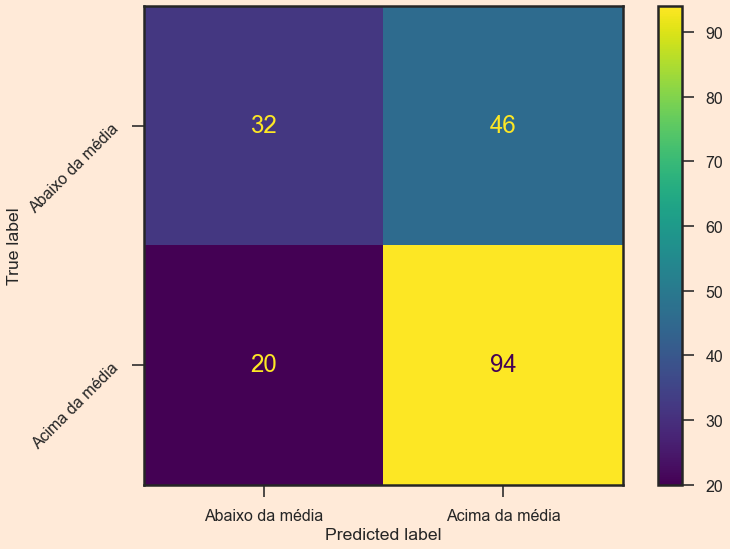

In [36]:
log_reg_prediction = log_reg.predict(X_test)
log_reg_cm = confusion_matrix(y_test, log_reg_prediction)
ConfusionMatrixDisplay(log_reg_cm, display_labels=["Abaixo da média", "Acima da média"]).plot()
plt.yticks(rotation=45)
plt.show()

### Métricas

In [37]:
log_reg_metricas = {'model': list(), 'accuracy': list(), 'precision': list(), 'recall': list(), 'f1_score': list()}
log_reg_metricas["accuracy"].append(accuracy_score(y_test, log_reg_prediction))
log_reg_metricas["precision"].append(precision_score(y_test, log_reg_prediction))
log_reg_metricas["recall"].append(recall_score(y_test, log_reg_prediction))
log_reg_metricas["f1_score"].append(f1_score(y_test, log_reg_prediction))
log_reg_metricas["model"].append('Regressão Logística')
log_reg_metricas = pd.DataFrame(log_reg_metricas)
log_reg_metricas

,model,accuracy,precision,recall,f1_score
0,Regressão Logística,0.66,0.67,0.82,0.74


In [38]:
print(
    classification_report(
        y_test,
        log_reg_prediction,
        target_names=["Livro abaixo da média", "Livro acima da média"]
    )
)

                       precision    recall  f1-score   support

Livro abaixo da média       0.62      0.41      0.49        78
 Livro acima da média       0.67      0.82      0.74       114

             accuracy                           0.66       192
            macro avg       0.64      0.62      0.62       192
         weighted avg       0.65      0.66      0.64       192



## SVC ( Support Vector Classifier )

O SVC é um algoritmo de classificação que utiliza um algoritmo de kernel para se classificar os dados. O kernel é uma função que calcula a distância entre dois pontos, podendo ela ser linear(Pearson), polimonial ou radial. 

Em seu nível mais simples (linear), o SVC utiliza uma linha infinita chamada de Hyperplane que busca separar os dados em dois grupos, um para os dados que estão acima da linha e outro para os dados que estão abaixo da linha. Os pontos que ficam mais próximos da linha são os que influênciam na posição da reta, e os pontos que ficam mais distantes da linha, não influênciam em nada na posição da reta. Desse modo, no modelo linear, é necessário que exista um limite linear para que a classificação ocorra corretamente, não funcionando para todo conjunto de dado.

Para se sair da linearidade, podemos elevar os dados ao quadrado, pr exemplo, para se buscar uma nova relação entre os pontos, entretanto, deve se levar em consideração o limite computacional, por isso que o SVC utiliza kernels, como o polinomial e radial, que buscam pela separação dos pontos além da linearidade, sem elevar o limite computacional de maneiar absurda.

In [39]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(kernel=kernel)
svc = SVC(probability=True, random_state=42)
svc = GridSearchCV(svc, param_grid, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_params_)

{'kernel': 'linear'}


No modelo buscamos o melhor resultado para o classificador do SVC utilizando 4 opções de kernel, sendo linear, polinomial, radial e a sigmoid as opções.

In [40]:
svc_param = pd.DataFrame(svc.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
svc_param['params'] = svc_param['params'].astype('string')
novo = svc_param['params'].str.split(',', expand=True)
svc_param['kernel'] = novo[0]
svc_param['kernel'] = svc_param['kernel'].replace("{'kernel': '", '', regex=True)
svc_param['kernel'] = svc_param['kernel'].replace("'}", '', regex=True)
svc_param.drop('params', axis=1, inplace=True)

In [41]:
svc_param

,mean_test_score,kernel
0,0.67,linear
1,0.67,poly
2,0.66,rbf
3,0.64,sigmoid


### Matriz de confusão

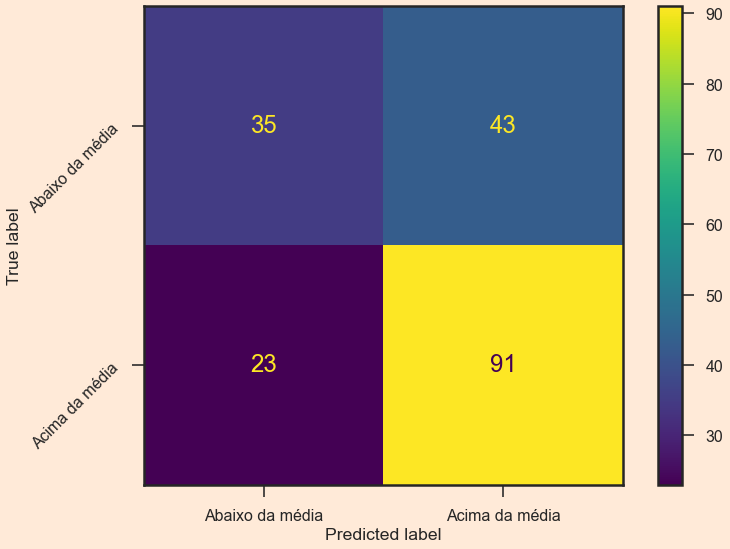

In [42]:
svc_prediction = svc.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_prediction)
ConfusionMatrixDisplay(svc_cm, display_labels=["Abaixo da média", "Acima da média"]).plot()
plt.yticks(rotation=45)
plt.show()

### Métricas

In [43]:
svc_metricas = {'model': list(), 'accuracy': list(), 'precision': list(), 'recall': list(), 'f1_score': list()}
svc_metricas["accuracy"].append(accuracy_score(y_test, svc_prediction))
svc_metricas["precision"].append(precision_score(y_test, svc_prediction))
svc_metricas["recall"].append(recall_score(y_test, svc_prediction))
svc_metricas["f1_score"].append(f1_score(y_test, svc_prediction))
svc_metricas["model"].append('SVC')
svc_metricas = pd.DataFrame(svc_metricas)
svc_metricas

,model,accuracy,precision,recall,f1_score
0,SVC,0.66,0.68,0.80,0.73


In [44]:
print(
    classification_report(
        y_test,
        svc_prediction,
        target_names=["Livro abaixo da média", "Livro acima da média"]
    )
)

                       precision    recall  f1-score   support

Livro abaixo da média       0.60      0.45      0.51        78
 Livro acima da média       0.68      0.80      0.73       114

             accuracy                           0.66       192
            macro avg       0.64      0.62      0.62       192
         weighted avg       0.65      0.66      0.64       192



## Decision Tree

Trabalhando com base em um DataFrame selecionado, optei por usar um modelo de árvore de decisão porque o modelo pode lidar com grandes conjuntos de dados e pode prever variáveis binárias categóricas e quantitativas. O algoritmo foi criado em 1983 por J. Ross Quinlan e por isso é conhecido como o "Pai das Árvores de Decisão". Uma árvore de decisão é uma representação visual de todos os caminhos de ação possíveis que uma pessoa pode seguir para tomar uma decisão. Ou seja, é uma ferramenta de representação visual que pode auxiliar na tomada de decisões, orientando diferentes caminhos.

Uma árvore de decisão consiste em várias formas gráficas (símbolos); muito semelhante a um fluxograma. Esses símbolos formam nós e ramos que dão forma à árvore e organizam os caminhos a serem seguidos pelas decisões. Um nó pode corresponder a uma ação, probabilidade, condição ou decisão a ser tomada. Ramificações representam caminhos que podem ser seguidos, ou seja, links entre nós. Normalmente, as árvores de decisão começam com um único nó, raiz, que se ramifica para outros nós contendo possíveis opções ou resultados. Cada uma dessas ramificações leva a outros nós que são subdivididos em outros nós filhos. Esse comportamento se repete até que todas as possibilidades sejam mapeadas, resultando em uma estrutura em árvore.

Comumente, as árvores de decisão são construídas horizontalmente, começando no lado esquerdo da página e movendo-se para a direita, mas algumas pessoas preferem construir verticalmente, de cima para baixo. O importante aqui é que a árvore seja construída de forma hierárquica, ou seja, as dependências entre os nós são bem definidas, claras e seguem a ordem dos eventos.

In [45]:
criterion = ['gini', 'entropy', 'log_loss']
max_depths = list(range(1, 20))
param_grid = dict(criterion=criterion, max_depth=max_depths)
dtc = DecisionTreeClassifier()
dtc = GridSearchCV(dtc, param_grid, scoring='accuracy')
dtc.fit(X_train, y_train)
print(dtc.best_params_)

{'criterion': 'log_loss', 'max_depth': 8}


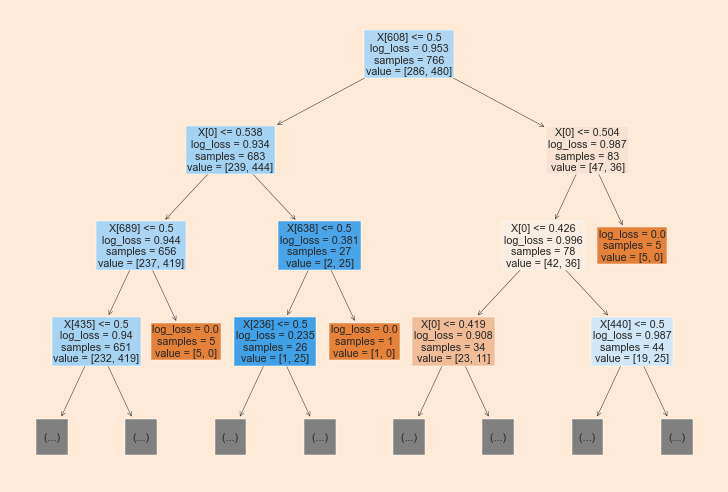

In [46]:
arvore_bonitinha = tree.plot_tree(dtc.best_estimator_, filled=True, max_depth=3)
plt.show()

Diagarma do inicio da árvore de decisão. 

A árvore de decisão é construída de forma hierárquica, ou seja, as dependências entre os nós são bem definidas, claras e seguem a ordem dos eventos.

In [47]:
dtc_param = pd.DataFrame(dtc.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
dtc_param['params'] = dtc_param['params'].astype('string')
novo = dtc_param['params'].str.split(',', expand=True)
dtc_param['criterion'] = novo[0]
dtc_param['max_depth'] = novo[1]
dtc_param['criterion'] = dtc_param['criterion'].replace("{'criterion': '", '', regex=True)
dtc_param['criterion'] = dtc_param['criterion'].replace("'", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].replace("'max_depth': ", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].replace("}", '', regex=True)
dtc_param['max_depth'] = dtc_param['max_depth'].astype('int')
dtc_param.drop('params', axis=1, inplace=True)

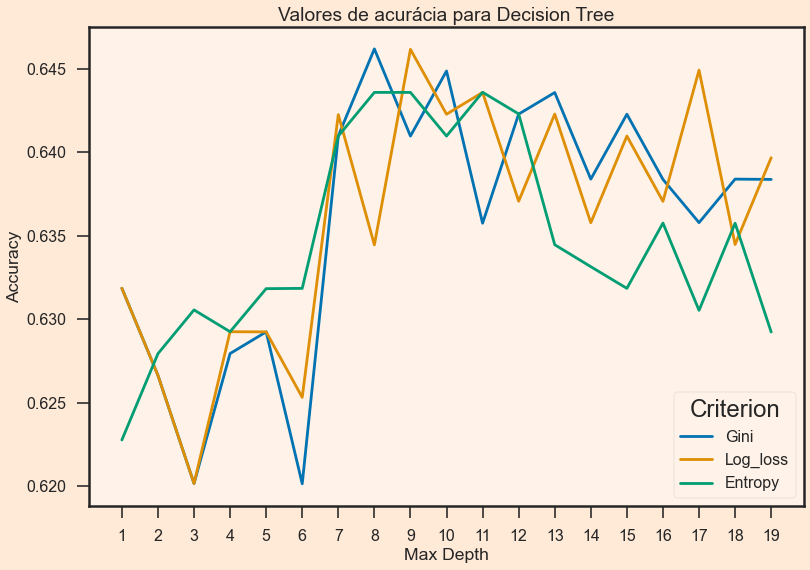

In [48]:
sns.lineplot(data=dtc_param, x='max_depth', y='mean_test_score', hue='criterion')
plt.title('Valores de acurácia para Decision Tree')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(max_depths)
plt.legend(title='Criterion', labels=['Gini', 'Log_loss', 'Entropy'], loc='lower right')
plt.show()

Medido pelo índice de Gini desenvolvido por Conrado Gini em 1912 heterogeneidade de dados. Portanto, pode ser usado para medir uma impureza existir.

Quando o índice é igual a 0, o nó é um nó puro. Por outro lado, quando ele mais próximo ao valor chega de 1, o nó é impuro, analisando nossa árvore, podemos observar que seus valores, mesmo sendo bons índices, não são perfeitos. Ou seja, analisando autores, editoras e preços, podemos observar que o valor das notas está mal formado e, após nosso processamento, podemos avaliar livros que estão no nível médio e livros que estão acima da média.

### Matriz de confusão

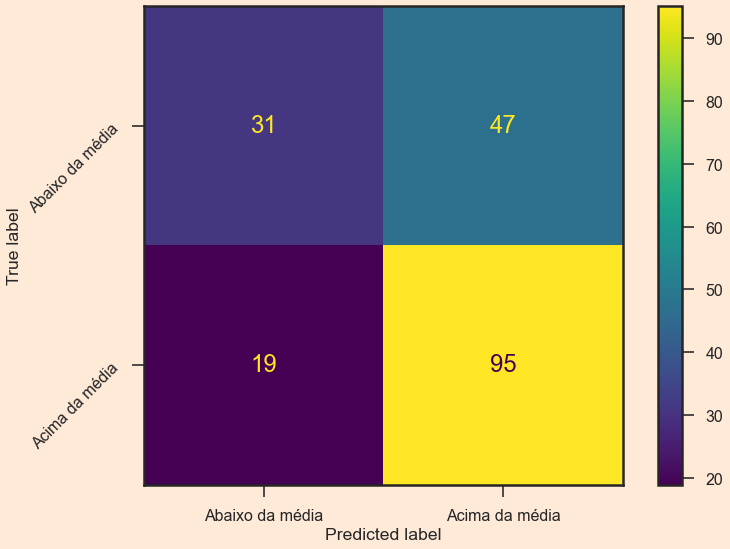

In [49]:
dtc_prediction = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test, knn_prediction)
ConfusionMatrixDisplay(dtc_cm, display_labels=["Abaixo da média", "Acima da média"]).plot()
plt.yticks(rotation=45)
plt.show()

### Métricas

In [50]:
dtc_metricas = {'model': list(), 'accuracy': list(), 'precision': list(), 'recall': list(), 'f1_score': list()}
dtc_metricas["accuracy"].append(accuracy_score(y_test, dtc_prediction))
dtc_metricas["precision"].append(precision_score(y_test, dtc_prediction))
dtc_metricas["recall"].append(recall_score(y_test, dtc_prediction))
dtc_metricas["f1_score"].append(f1_score(y_test, dtc_prediction))
dtc_metricas['model'].append('Decision Tree')
dtc_metricas = pd.DataFrame(dtc_metricas)
dtc_metricas

,model,accuracy,precision,recall,f1_score
0,Decision Tree,0.64,0.62,0.98,0.76


In [51]:
print(
    classification_report(
        y_test,
        dtc_prediction,
        target_names=["Livro abaixo da média", "Livro acima da média"]
    )
)

                       precision    recall  f1-score   support

Livro abaixo da média       0.83      0.13      0.22        78
 Livro acima da média       0.62      0.98      0.76       114

             accuracy                           0.64       192
            macro avg       0.73      0.56      0.49       192
         weighted avg       0.71      0.64      0.54       192



A Árvore de decisão possui como vantagensa a facilidade de compreensão, podem ser úteis com ou sem dados concretos, e quaisquer dados requerem o mínimo de preparação, novas opções podem ser adicionadas às árvores existentes e seu valor pode ser escolhido dentre a melhor opções. 

E como desvantagens as árvores de decisão podem se tornar excessivamente complexas. Em tais casos, um diagrama de influência mais compacto pode ser uma boa alternativa. Diagramas de influência focam em decisões mais críticas, entradas e objetivos.

## Comparando os modelos

Abaixo iremos comparar os resultados dos modelos, verificando as vantagens e vantagens de cada um deles e qual modelo consegue classificar melhor se um livro está acima ou abaixo da média.

### Tabela

In [52]:
compara = pd.concat([dummy_metricas, knn_metricas, log_reg_metricas, svc_metricas, dtc_metricas])
compara.set_index('model', inplace=True)
compara

,accuracy,precision,recall,f1_score
model,,,,
Dummy,0.52,0.58,0.64,0.61
KNN,0.66,0.67,0.83,0.74
Regressão Logística,0.66,0.67,0.82,0.74
SVC,0.66,0.68,0.80,0.73
Decision Tree,0.64,0.62,0.98,0.76


Na tabela podemos comparar como cada classificador se comporta aos dados.

**Acurácia**

Apesar da acurácia ser a métrica mais conhecida, o seu resultado pode ser incompleto sem a interpertação de outros dados. Assim a precisão e o recall são outras métricas que nos auxiliam a avaliar o resultado de cada classificador.

**Recall**

Qual foi a taxa de recall/acerto do modelo de todas as observações verdadeiramente positivas? O recall é a métrica que nos indica isso, mostrando o quanto um classificador classificou os dados como verdadeiros. Para se calcular se divide o número de observações verdadeiramente positivas pelo total de observações classificadas como verdadeiras.

**Precisão**

Entre os exemplos positivos identificados, quantos foram realmente positivos? A precisão é a capacidade do classificador de evitar rotular uma observação negativa como positiva. Para calcular a precisão, divida o número de observações positivas corretas, pelo total de observações positivas pervistas.

**F1-score**

Como a acurácia nem sempre é a melhor opção, e podemos estar interessados ​​tanto na precisão quanto no recall, podemos utiliza o f1-score para mesclar essas duas pontuações e fazer a média delas. No aprendizado de máquina, no entanto, geralmente empregamos um método diferente de calcular a média dessas medições juntas, conhecido como "média harmônica". O benefício disso é que ele penaliza mais o modelo por mau desempenho em precisão ou recall, enquanto se considerarmos apenas a média aritmética comum, o modelo pode compensar um baixo recall com alta precisão e ainda receber uma pontuação geral alta.

 ------------------------------------------------------------------------------------ 

Como esperado, o classificador Dummy, possui os piores resultados de acurácia, precisão, recall e f1-score. E além disso, nenhum dos outros modelos possui resultados abaixo dele, mostrando que podemos confiar um pouco mais em seus resultados.

Todos os outros modelos possuem resultados parecidos entre si, com apenas o modelo de Árvore de Decisão sendo o que possui um valor alto para recall em comparação, classificando os positivos de forma melhor.

Os modelos retornaram um valor de precisão menor que o valor de recall, pondendo ser apenas eventualidade, ou a divisão de livros acima e abaixo da média não tenha sido a melhor opção, se fazendo necessário buscar por um maior número de dados, visto que os modelos trabalharam com menos de 800 livros únicos para treinarem os algoítimos.

### ROC Curve

A curva ROC é um gráfico de curva de acurácia que mostra a taxa de acerto do classificador em relação à taxa de erro. Usada para se comparar de forma mais eficiente as matrizes de confusão entre os modelos.

In [53]:
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]).round(2)
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]).round(2)
svc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1]).round(2)
dtc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1]).round(2)
dummy_auc = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1]).round(2)

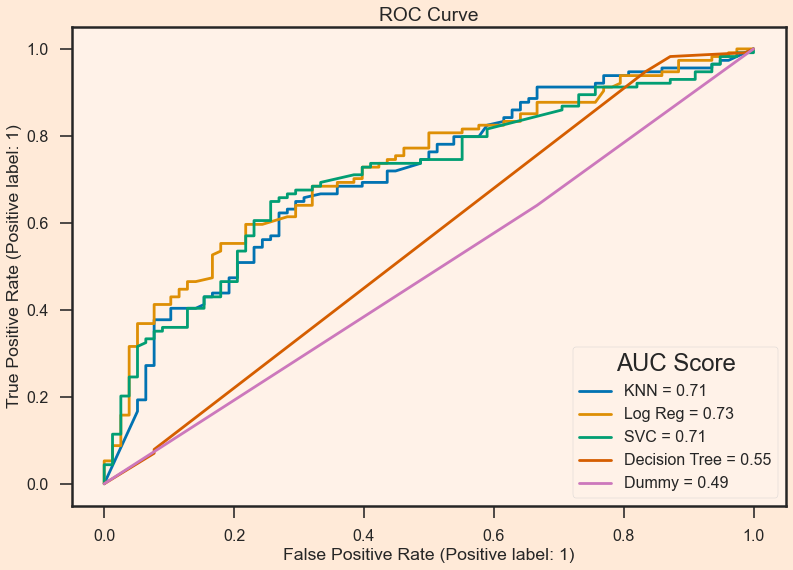

In [54]:
from sklearn.metrics import RocCurveDisplay

#knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

ax = plt.gca()


knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax)
log_reg_disp = RocCurveDisplay.from_estimator(log_reg, X_test, y_test, ax=ax)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test, ax=ax)
dummy_disp = RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax)

plt.title('ROC Curve')

plt.legend(
    title='AUC Score',
    labels=[f'KNN = {knn_auc}', f'Log Reg = {log_reg_auc}', f'SVC = {svc_auc}', f'Decision Tree = {dtc_auc}',  f'Dummy = {dummy_auc}'],
    loc='lower right'
)

plt.show()

Quanto um ponto da curva está mais a esqueda e para cima no gráfico, significa que o classificador possue mais Positivos Verdadeiros do que Falso Positivos.

O melhor ponto possível para se encontrar o modelo, é o ponto (0,1), onde o classificador classifica todos os dados corretamente, entretanto, este ponto se é impossível de ser alcançado.

Além da curva ROc, a Área Abaixo da Curva (AUC) é uma medida de qualidade do classificador, que indica a probabilidade de classificar corretamente os dados, além de seu resultado facilitar na compararção entre as curvas ROC.

## Joblib

Colocando os modelos no Joblib [aqui](https://github.com/JonasBrother97/jeff_final/tree/master/joblib) para que qualque usuário os utilize.

In [55]:
dump(knn, 'knn.joblib')
dump(log_reg, 'log_reg.joblib')
dump(svc, 'svc.joblib')
dump(dtc, 'dtc.joblib')
dump(X_test, 'X.joblib')
dump(y_test, 'y.joblib');

# Parte 2: Categrizando a partir da sinopse

## Modelo Naive Bayes

Baseado no problema de negócio, eu gostaria de saber se **"a partir da sinopse de um livro, é possível predizer a categoria do livro?"**

Neste contexto, escolhi o modelo Naive Bayes Multinomial, pois o modelo toma como premissa a suposição de independência entre as variáveis do problema, o modelo de Naïve Bayes realiza uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. Frequentemente aplicado em processamento de linguagem natural, o método pode ser usado quando os atributos que descrevem as instâncias forem condicionalmente independentes. Ou seja, o teorema de Bayes trata sobre probabilidade condicional. Isto é, qual a probabilidade de o evento A ocorrer, dado o evento B.

  O teorema foi desenvolvido pelo estatístico, filósofo e ministro presbiteriano Thomas Bayes (1701 - 1761) e publicado depois de sua morte pelas mãos de Richard Price (1723 - 1791), um padre, filósofo e matemático galês, sendo definido como:
  
  P(E)P(E) = P(H)P(H)
  
  Em que P (H) é a probabilidade de que uma hipótese (H) seja verdadeira, antes de qualquer evidência (E) ser conhecida. O termo P(H) é a probabilidade de observarmos uma evidência (E), dado que a hipótese (H) é verdadeira. Por outro lado, P(E) é a probabilidade de observação da evidência (E) e P(E) é a probabilidade de que a hipótese (H) seja verdadeira, dada a evidência observada (E).
  
  Utilizei também a técnica do N-grama, onde segundo o wikipedia **"um n-grama é uma sequência contígua de n itens de uma determinada amostra de texto ou fala. Os itens podem ser fonemas, sílabas, letras, palavras ou pares de bases de acordo com a aplicação. Os n-gramas normalmente são coletados de um corpus de texto ou fala".** Ainda, segundo o Wikepedia **"Usando prefixos numéricos latinos, um n -grama de tamanho 1 é referido como um "unigrama"; o tamanho 2 é um " bigrama " (ou um "digrama"); o tamanho 3 é um " trigrama ". Os números cardinais são às vezes usados, por exemplo, "quatro grama", "cinco grama" e assim por diante".** Nos meus exemplos me limitei ao bigrama devido ao tempo e complexidade de aumentar a quantidade de textos em sequência, além do poder computacional limitado.
  
  Além do N-grama, também foi utilizado a técnica dos "***stopwords***" , que são palavras que podem causar um ruído menos evidente ao texto. Segundo a wikepedia -  **uma palavra vazia (ou stop word, em inglês) é uma palavra que é removida antes ou após o processamento de um texto em linguagem natural.** Não existe uma lista universal de palavras vazias usadas por todas as ferramentas de processamento de linguagem natural e nem todas ferramentas fazem uso de uma lista dessas palavras. Algumas ferramentas, inclusive, evitam remover as chamadas "palavras vazias" para dar suporte à busca de sentenças.
  
  Por fim, uma curisidade sobre o Naive é: Ele recebe o nome de “naive” (ingênuo) porque desconsidera a correlação entre as variáveis (features). Ou seja, se determinada fruta é rotulada como “Limão”, caso ela também seja descrita como “Verde” e “Redonda”, o algoritmo não vai levar em consideração a correlação entre esses fatores. Isso porque trata cada um de forma independente.

## Ajustando o dataframe:

  **A**. Filtrando as 2 colunas (sinopse e categoria) que são o X e o Y respectivamente;
  
  **B**. Gerando um id_categoria para facilitar na manipulação do algoritmo;
  
  **C**. Convertendo as letras maiúsculas em minúsculas na nova coluna com a sinpse;
  
  **D**. Gerando um head(10) para ver como ficaram as 10 primeiras linhas do dataframe.

In [56]:
#separando as colunas
col = ['sinopse', 'categoria']
df_NB = df[col]
#renomeando e gerando o id_categoria
df_NB.columns = ['sinopse', 'categoria']
df_NB['id_categoria'] = df_NB['categoria'].factorize()[0]
category_id_df = df_NB[['categoria', 'id_categoria']].drop_duplicates().sort_values('id_categoria')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['id_categoria', 'categoria']].values)
#convertendo maiúsculo em minúscula
df_NB['coluna'] = df_NB['sinopse'].str.lower()
#visualizando o resultado
df_NB.head(10)

,sinopse,categoria,id_categoria,coluna
0,A renovação se constrói todos os dias. É um ol...,Categoria Autoajuda,0,a renovação se constrói todos os dias. é um ol...
1,"O sétimo livro da série As Sete Irmãs, fenômen...",Categoria Ficção,1,"o sétimo livro da série as sete irmãs, fenômen..."
2,Deixe de lado a mentalidade de estar sempre ve...,Categoria Negócios,2,deixe de lado a mentalidade de estar sempre ve...
3,"Para ser um pioneiro, um inconformado, você de...",Categoria Negócios,2,"para ser um pioneiro, um inconformado, você de..."
4,"Um suspense moderno e sofisticado, Mentirosos ...",Categoria Infantojuvenil,3,"um suspense moderno e sofisticado, mentirosos ..."
5,O que pode acontecer quando o filho da preside...,Categoria Infantojuvenil,3,o que pode acontecer quando o filho da preside...
6,Com todo o esplendor que só a Hollywood do séc...,Categoria Ficção,1,com todo o esplendor que só a hollywood do séc...
7,"Neste livro, inédito no Brasil, você vai desco...",Categoria Autoajuda,0,"neste livro, inédito no brasil, você vai desco..."
8,"Um texto épico e lírico, realista e mágico que...",Categoria Ficção,1,"um texto épico e lírico, realista e mágico que..."
9,"Um verão na Itália, uma antiga história de amo...",Categoria Ficção,1,"um verão na itália, uma antiga história de amo..."


## Verificando se os dados estão balanceados:

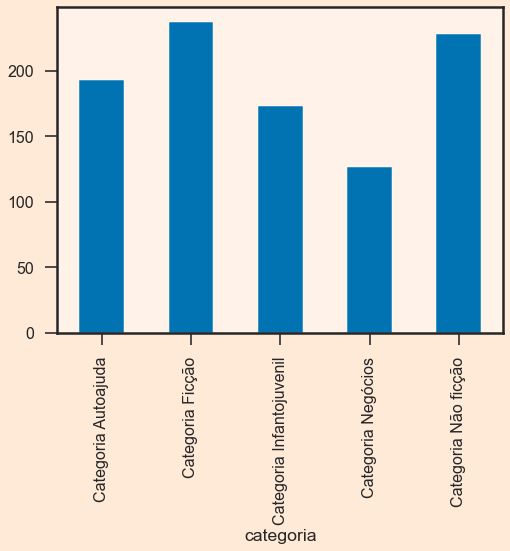

In [57]:
#analisando os dados se estão balanceados:
fig = plt.figure(figsize=(8,6))
df_NB.groupby('categoria').sinopse.count().plot.bar(ylim=0)
plt.show()

## Verificando as stopwords da biblioteca NLTK, e as aplicando no DF gerando uma coluna nova

In [58]:
stopwords=nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [59]:
#aplicando o stopword
df_NB['coluna'] = df_NB['sinopse'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stopwords)]))


In [60]:
#verificando a frequencia que cada palavra acontece
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2))
features = tfidf.fit_transform(df_NB.coluna.values.astype('U')).toarray()

labels = df_NB.id_categoria
features.shape

(958, 4271)

## Comparando Naive Bayes com outros modelos:

À título de curiosidade, eu testei a acurácia de 4 outros modelos - Random Forest, Linear SVC(Support Vector Machine) e Regressão Logistica para saber como estava o multinomialNB com relação à outros classificadores.

**A**. Criei uma lista com outros modelos;

**B**. Gerei um dataframe com os modelos;

**C**. Gerei um gráfico no seaborn para facilitar a visualização da comparação;

**D**. Por fim gerei a acurácia para cada modelo.


In [61]:
#criando uma lista com Random Forest, Linear SVC(Support Vector Machine e Regressão Logistica)
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


## Analisando os resultados: 

  No gráfico abaixo é possível ver que nosso modelo não está ruim, porém o SVM e a regressão Logistica se mostram levemente melhores, o que fica visivel ao calcular mais abaixo as acurácias.
  
  De qualquer forma, meu foco é trabalhar com Naive Bayes e portanto, seguirei com o algoritmo.

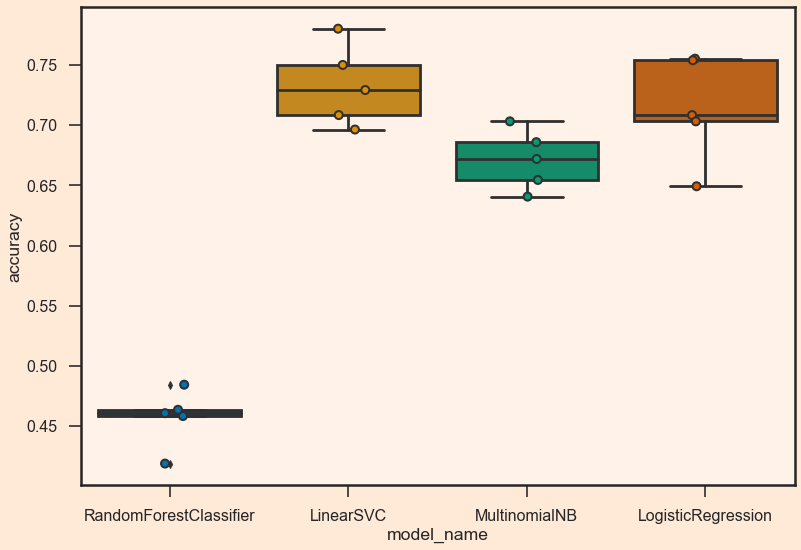

In [62]:
#gerando o gráfico das comparações:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [63]:
#verificando a acurácia dos modelos
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                0.73
LogisticRegression       0.71
MultinomialNB            0.67
RandomForestClassifier   0.46
Name: accuracy, dtype: float64

## Avaliação dos Modelos: 

 30% dos dados de treinamento foram separados para teste para avaliar a performance do modelo

In [64]:
#Separando em treino e teste o Naive Bayes multinomial
model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_NB.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## Gerando a matriz de confusão dos dados multiclasse:

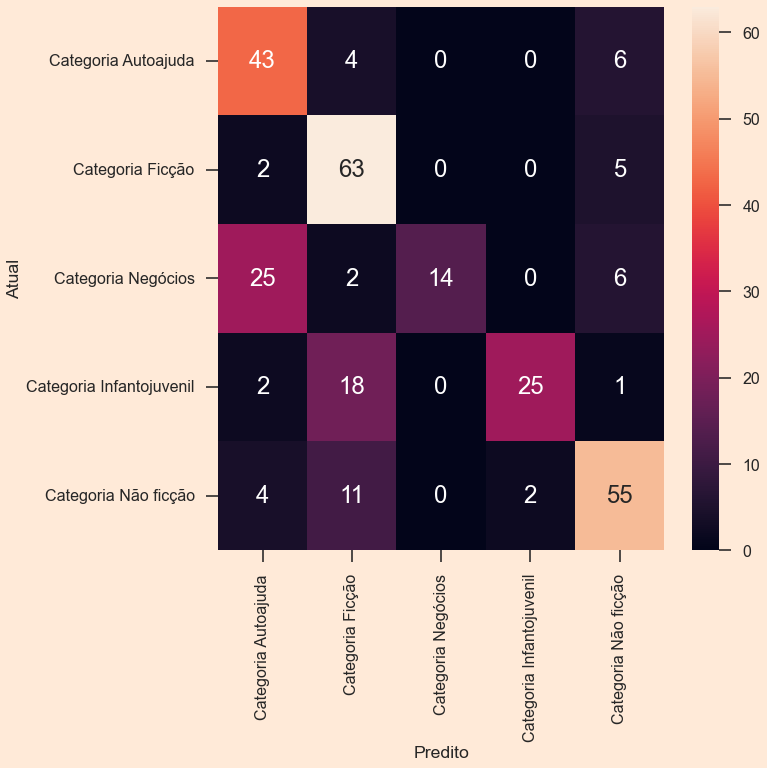

In [65]:
#gerando a matriz de confusão para cada categoria:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.categoria.values, yticklabels=category_id_df.categoria.values)

plt.ylabel('Atual')
plt.xlabel('Predito')
plt.show()

## Análise da matriz de confusão:

  A diagonal nos mostra os acertos do modelo.
  
  No entanto, há uma série de erros de classificação, e pode ser interessante ver o que eles são causados por:

In [66]:
#analisando os erros de predição:
for predicted in category_id_df.id_categoria:
    for actual in category_id_df.id_categoria:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predita como '{}' : {} exemplos.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df_NB.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['categoria', 'sinopse']])
            print('')

'Categoria Negócios' predita como 'Categoria Autoajuda' : 25 exemplos.


,categoria,sinopse
764,Categoria Negócios,A Bíblia é o melhor manual sobre o sucesso já ...
644,Categoria Negócios,O livro ajuda gestores e empreendedores a enca...
239,Categoria Negócios,Uma vida rica pressupõe a realização de sonhos...
320,Categoria Negócios,"Em algum momento, a vida nos cobra por tudo aq..."
549,Categoria Negócios,O primeiro Geração de Valor vendeu mais de 100...
145,Categoria Negócios,"Aposto que você quer, no final da sua vida, ol..."
356,Categoria Negócios,Qual é o maior segredo de um negócio de sucess...
272,Categoria Negócios,Propósito. Todo mundo fala desse conceito hoje...
175,Categoria Negócios,Como se diferenciar em um mundo com tantas opç...
358,Categoria Negócios,Mudanças profundas e substanciais acontecem ra...



'Categoria Infantojuvenil' predita como 'Categoria Ficção' : 18 exemplos.


,categoria,sinopse
879,Categoria Infantojuvenil,Os deuses do Egito Antigo foram libertados no ...
141,Categoria Infantojuvenil,Certas portas não devem ser abertas. E Coralin...
903,Categoria Infantojuvenil,Divirta-se com este maravilhoso conto musical ...
379,Categoria Infantojuvenil,O segundo volume da nova série da Cassandra Cl...
214,Categoria Infantojuvenil,"Ao voltar da escola, Clay Jensen encontra um m..."
676,Categoria Infantojuvenil,"Autora de Minha vida fora de série, Paula Pime..."
631,Categoria Infantojuvenil,"No desfecho da série Os heróis do Olimpo, os t..."
424,Categoria Infantojuvenil,"O sangue de Mare Barrow é vermelho, da mesma c..."
745,Categoria Infantojuvenil,"Na 2ª temporada de Minha vida fora de série, P..."
5,Categoria Infantojuvenil,O que pode acontecer quando o filho da preside...



'Categoria Não ficção' predita como 'Categoria Ficção' : 11 exemplos.


,categoria,sinopse
793,Categoria Não ficção,Gianecchini enfim se permitiu encarar o pensam...
350,Categoria Não ficção,A obra definitiva sobre o conflito que marcou ...
857,Categoria Não ficção,"Dentro de um abraço é sempre quente, é sempre ..."
919,Categoria Não ficção,Um quase desconhecido e autodidata terapeuta v...
742,Categoria Não ficção,"É uma tarde de outono em Covent Garden, Londre..."
494,Categoria Não ficção,O papai é pop está de volta! Marcos Piangers v...
416,Categoria Não ficção,"O diário de Anne Frank, o depoimento da pequen..."
583,Categoria Não ficção,Uma aventura de colorir\nDeixe sua mente se av...
634,Categoria Não ficção,Quando o Talibã tomou controle do vale do Swat...
493,Categoria Não ficção,"Então, você vai ser pai. Você sabe que precisa..."


## Persistência do Modelo:

In [67]:
arquivo = 'predicao_nb.sav'
pickle.dump(model, open(arquivo, 'wb'))
# Carregando o modelo do disco
loaded_model = pickle.load(open(arquivo, 'rb'))
# Atribui a variável result o score do modelo
result = loaded_model.score(X_test, y_test)
#Imprime o resultado
print(result)

0.6944444444444444


## Gerando os N-gramas:

 Encontrando os termos mais correlacionados com cada uma das categorias

In [68]:
#fit do modelo:
model.fit(features, labels)

#definindo 2 para N-gramas e buscando as palavras:
N = 2
for Coluna, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.feature_log_prob_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Coluna))
    print("  . Top unigramas:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigramas:\n       . {}".format('\n       . '.join(bigrams)))

# 'Categoria Autoajuda':
  . Top unigramas:
       . vida
       . livro
  . Top bigramas:
       . neste livro
       . este livro
# 'Categoria Ficção':
  . Top unigramas:
       . amor
       . história
  . Top bigramas:
       . história amor
       . best seller
# 'Categoria Infantojuvenil':
  . Top unigramas:
       . greg
       . mundo
  . Top bigramas:
       . greg heffley
       . percy jackson
# 'Categoria Negócios':
  . Top unigramas:
       . sucesso
       . vida
  . Top bigramas:
       . neste livro
       . cada vez
# 'Categoria Não ficção':
  . Top unigramas:
       . livro
       . sobre
  . Top bigramas:
       . este livro
       . neste livro


## Resultados

Por fim, imprimo o relatório de classificação para cada classe. Nota-se que a Categoria negócios pode haver overfitting:

In [69]:
print(metrics.classification_report(y_test, y_pred, target_names=df_NB['categoria'].unique()))

                          precision    recall  f1-score   support

     Categoria Autoajuda       0.57      0.81      0.67        53
        Categoria Ficção       0.64      0.90      0.75        70
      Categoria Negócios       1.00      0.30      0.46        47
Categoria Infantojuvenil       0.93      0.54      0.68        46
    Categoria Não ficção       0.75      0.76      0.76        72

                accuracy                           0.69       288
               macro avg       0.78      0.66      0.66       288
            weighted avg       0.76      0.69      0.68       288



## Predict e testes em outras sinopses de livros aleatórios:

Peguei aleatóriamente o livro Demon Slayer: Kimetsu No Yaiba - 1 (ficção), Meu jeito de dizer que te amo (não ficçao) e O poder da cura (autoajuda) para testar o resultado do predict: 

In [70]:
sinopses = ["Estamos na Era Taishou. O dia-a-dia pacato de Tanjiro, um gentil garoto que vende carvão, se transforma radicalmente \
quando sua família é assassinada por um demônio. A única sobrevivente é Nezuko, sua irmã mais nova. Porém, agora, ela se \
transformou em um Oni. Diante dessa tragédia, os dois irmãos partem em uma jornada para derrotar o Oni que matou sua mãe e \
irmãozinhos. E assim tem início uma aventura sanguinolenta de espadachins!", "Para amar. Para declarar o amor. Para reafirmar \
o amor. Para amar mais e ser amado. Para merecer o amor hoje e sempre. Para devolver em dobro o amor que nos foi dado. Todas \
as vezes que as palavras faltarem. Em todos os momentos que o sentimento embargar a voz. Sempre que o coração estiver pulsando \
mais forte que o pensamento. Meu jeito de dizer que te amo: um livro cheio do amor que todo mundo deseja e merece receber de \
você", "Neste livro, Padre Reginaldo Manzotti revela para nós os caminhos que devemos trilhar para tomar posse dos remédios que \
o Médico dos médicos coloca diariamente à nossa disposição para que sejamos interiormente completos. Cheias de sabedoria e piedade, \
estas páginas constituem um alento necessário para o duro tempo em que vivemos."]

func = (lambda x: ' '.join([word for word in str(x).split() if word not in (stopwords)]))

dicionario = {}
values = []
resultado = []

for i in range(len(sinopses)):
    values.append(func(sinopses[i]))
    dicionario[sinopses[i]] = values[i]
    text_features = tfidf.transform([list(dicionario.values())[i]])
    resultado.append(model.predict(text_features))

    for text, predicted in zip([sinopses[i]], resultado[i]):
        print('"{}"'.format(text))
        print("Predito como: '{}'".format(id_to_category[predicted.item(0)]))
        print("")

"Estamos na Era Taishou. O dia-a-dia pacato de Tanjiro, um gentil garoto que vende carvão, se transforma radicalmente quando sua família é assassinada por um demônio. A única sobrevivente é Nezuko, sua irmã mais nova. Porém, agora, ela se transformou em um Oni. Diante dessa tragédia, os dois irmãos partem em uma jornada para derrotar o Oni que matou sua mãe e irmãozinhos. E assim tem início uma aventura sanguinolenta de espadachins!"
Predito como: 'Categoria Ficção'

"Para amar. Para declarar o amor. Para reafirmar o amor. Para amar mais e ser amado. Para merecer o amor hoje e sempre. Para devolver em dobro o amor que nos foi dado. Todas as vezes que as palavras faltarem. Em todos os momentos que o sentimento embargar a voz. Sempre que o coração estiver pulsando mais forte que o pensamento. Meu jeito de dizer que te amo: um livro cheio do amor que todo mundo deseja e merece receber de você"
Predito como: 'Categoria Autoajuda'

"Neste livro, Padre Reginaldo Manzotti revela para nós os c

# Limitações

  Este projeto tem desafios do tipo:

  - O tempo de coleta de um web crawling é demasiado longo e pode conter erros que devem ser tratados manualmente;
  - Os dados não possuem uma forte coelação entre si, mitigando a capacidade de classificação nos que depende dessa linearidade;
  - A base de dados é pequena, apesar de acertar bem;
  - No modelo Naive Bayes foi usado Categoria, o que pode confundir pois é um nivel alto de agrupamento;
  - Ainda no modelo Naive Bayes, não houve aulas e na internet a maioria dos modelos usa o Y como binário, sendo difícil de achar exemplos multiclasses.

# 10. Conclusões e Próximos passos:

  No geral o modelo não está ruim, atende e acerta na maioria dos casos. Há o desafio de aumentar a base, coletando mais dados de livros únicos e aumentando também a sub categoria dos livros, onde provavelmente aumentaria a precisão do predict no acerto.
  
  - Aumentar a base coletando mais informações;
  - Buscar por mais hiperparâmetros para os modelos;
  - No modelo Naive Bayes rodar o modelo para sub categorias.

# Fontes e referências:

  https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f, Acesso em 21/05/2022
  
  https://towardsdatascience.com/nlp-basics-hands-on-a-portuguese-dialect-classifier-deployed-online-in-3-steps-53a8b3b88ea9, Acesso em 21/05/2022
  
  https://www.digitalhouse.com/br/blog/naive-bayes/, Acesso em 04/06/2022
  
  https://www.datageeks.com.br/naive-bayes/, acesso em 05/06/2022
  
  https://pt.wikipedia.org/wiki/N-grama, acesso em 11/06/2022
  
 https://pt.wikipedia.org/wiki/Palavra_vazia#:~:text=Na%20computa%C3%A7%C3%A3o%2C%20uma%20palavra%20vazia,um%20texto%20em%20linguagem%20natural. Acesso em 11/06/2022

 https://scikit-learn.org/0.21/documentation.html, acesso em 15/06/2022